In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train = X_train.reshape((60000, 28*28))  # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# 0 ~ 255 갭이 크니까. 연산속도를 줄이기 위해
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
from keras import models
from keras import layers
from keras import regularizers

Model = models.Sequential()
Model.add(layers.Dense(512, activation='relu', input_shape=(28*28,), 
                       kernel_regularizer = regularizers.l2(0.00001)))
Model.add(layers.Dense(256, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
Model.add(layers.Dense(10, activation='softmax'))

Model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist = Model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)



In [13]:
Model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
Hist = Model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

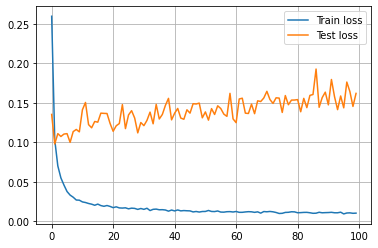

In [17]:
import matplotlib.pyplot as plt

plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [18]:
loss, accuracy = Model.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9788
0.1420518010854721 0.9787999987602234


## epoch만 늘린 -loss가 오히려 커짐, accuracy도 오히려 조금 낮낮아짐아짐

In [ ]:
Model1 = models.Sequential()
Model1.add(layers.Dense(512, activation='relu', input_shape=(28*28,), 
                       kernel_regularizer = regularizers.l2(0.00001)))
Model1.add(layers.Dense(256, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
Model1.add(layers.Dense(10, activation='softmax'))

Model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist1 = Model1.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2)

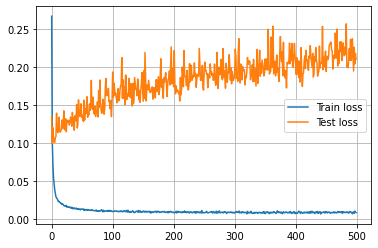

In [21]:
import matplotlib.pyplot as plt

plt.plot(Hist1.history['loss'])
plt.plot(Hist1.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [22]:
loss, accuracy = Model1.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1964 - accuracy: 0.9772
0.19641834497451782 0.9771999716758728


## node를 줄이기만

In [ ]:
Model2 = models.Sequential()
Model2.add(layers.Dense(256, activation='relu', input_shape=(28*28,), 
                       kernel_regularizer = regularizers.l2(0.00001)))
Model2.add(layers.Dense(130, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
Model2.add(layers.Dense(10, activation='softmax'))

Model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Hist2 = Model2.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

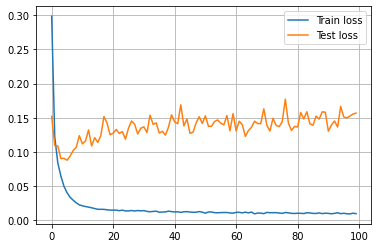

In [24]:
import matplotlib.pyplot as plt

plt.plot(Hist2.history['loss'])
plt.plot(Hist2.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

In [25]:
loss, accuracy = Model2.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.9791
0.1394888460636139 0.9790999889373779
